This is a systematic attempt to fix the code which is currently returning the wrong phi and is unable to extract the correct refactive index.

In [1]:
import numpy as np
import Functions as f
import matplotlib.pyplot as plt
from RefractiveIndexClass import RefractiveIndex as RI
    

The data below is generated using the refractive index of fused silica as modelled in si-kvectors.py

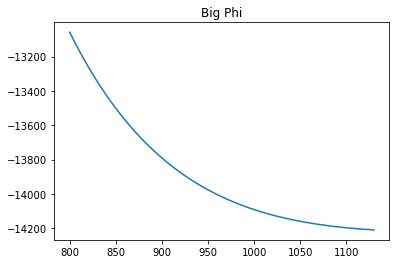

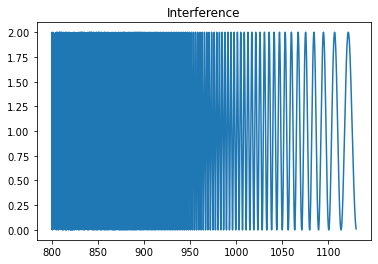

In [2]:
def m2nm(x):
    return x * 1e9

# Parameters
wavelengths = np.linspace(800, 1130, 10000) # [nm]
ZDW = 1300                          # Zero delay wavelngth [nm]
delta = 0                           # phase shift
central_wavelength = 840           # [nm]
sigma = 20                          # Bandwidth
L_f = 0.2                           # Fibre length [m]
L_f = m2nm(L_f)                     # Fibre length [nm]
L_air = - L_f * RI.n_group(RI.n_fs, ZDW) + delta                               # Required air difference for ZDW

# Interfernce
Phi = 2 * np.pi / wavelengths * (L_air  + L_f * RI.n_fs(wavelengths))     # Spectral phase difference
plt.plot(wavelengths, Phi)
plt.title("Big Phi")
plt.show()
interference = 1 + np.cos(Phi)
plt.plot(wavelengths, interference)
plt.title("Interference")
plt.show()

Now we want to try to re-extract the Phi without having to shift anything. I.e. can we completely recover phi from the interference

Shift amount:  5000


/Users/jackmorse/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/jackmorse/Documents/University/Year 4/Semester 1/FYP/Physics-FYP/Functions.py:118: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 2)
/Users/jackmorse/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


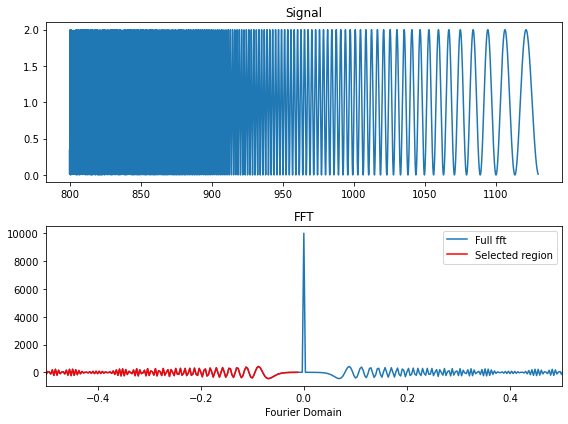

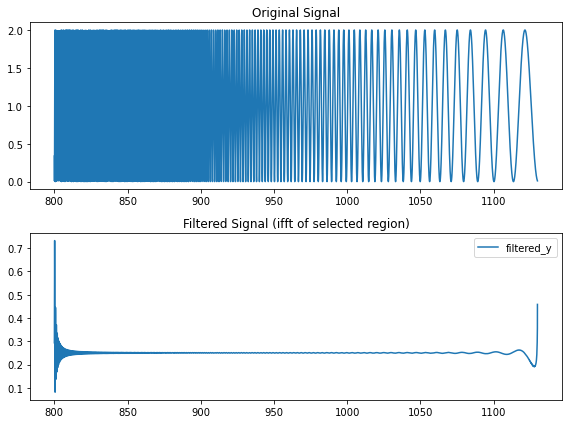

[    2.23291581     2.49275688     2.39059554 ... -1147.26802882
 -1147.27330941 -1147.42827868]
MIN:  -1147.428278680692
MAX:  2.4927568803537437
Final ys:
[    2.23291581     2.49275688     2.39059554 ... -1147.26802882
 -1147.27330941 -1147.42827868]


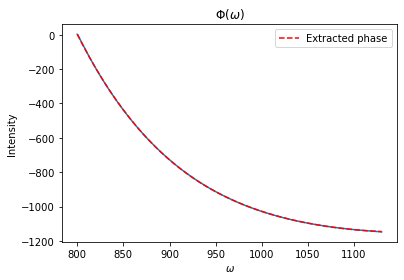

[ 6.53592917e-08 -2.88064280e-04  4.81022150e-01 -3.61053123e+02
  1.01708169e+05]


In [3]:
sif = f.SI_Functions()
coefficients = sif.DeltaPhiRetrievalProcedure(wavelengths, interference, fft_x_lim=[-0.5, 0.5], order=4, keep_min_freq=0.01)[1]
print(coefficients)

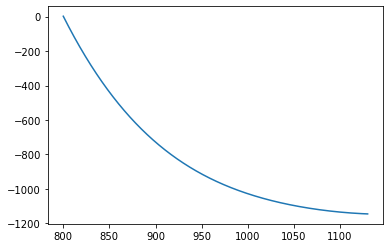

In [5]:
extractedPhi = np.polyval(coefficients, wavelengths)
plt.plot(wavelengths, extractedPhi)

In [6]:
diff = Phi[0] - extractedPhi[0]

In [10]:
2 * np.pi / wavelengths * (L_air  + L_f * RI.n_fs(wavelengths))
n = (extractedPhi * (wavelengths / (2 * np.pi)) - L_air) / L_f

-1039.349757080233